<a href="https://colab.research.google.com/github/dannyjammooa/LANL/blob/main/Two_qubit_Hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
pip install qiskit;

     |████████████████████████████████| 6.1 MB 6.2 MB/s 
     |████████████████████████████████| 18.0 MB 121 kB/s 
     |████████████████████████████████| 234 kB 54.2 MB/s 
     |████████████████████████████████| 207 kB 66.7 MB/s 
     |████████████████████████████████| 2.1 MB 58.9 MB/s 
     |████████████████████████████████| 199 kB 65.6 MB/s 
     |████████████████████████████████| 635 kB 55.9 MB/s 
     |████████████████████████████████| 1.4 MB 46.5 MB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
     |████████████████████████████████| 943 kB 63.7 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 33.9 MB 16 kB/s 
     |████████████████████████████████| 3.2 MB 36.8 MB/s 
     |████████████████████████████████| 6.3 MB 44.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.28.0-py3-none-any.whl size=11090 sha256=9ab7ca6a2069288ccfc59987ba61b9d3013017cde0d82448e4de2cf04a7dda4c
  Stored in directory: /root/.cache/pip/whe

In [2]:
import numpy as np
import warnings
from tqdm.auto import tqdm
import qiskit as qk
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit import Aer, assemble
from qiskit.visualization import circuit_drawer, plot_histogram, plot_state_qsphere
from qiskit import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pi = np.pi
%matplotlib inline

# Two qbit System

Consider the two qbit Hamiltonian:

\begin{equation}
   H = A \sigma_0 \cdot \sigma_1 + B (\sigma_{0}^z + \sigma_1^z),
\end{equation}
where $\sigma_0 \cdot \sigma_1 = 
\sigma_0^x \sigma_1^x + 
\sigma_0^y \sigma_1^y + 
\sigma_0^z \sigma_1^z  $.
This is a simplification of Eq. 3 in the paper by Smith, Kin, Pollman, and Knolle.
The eigenstates of this Hamiltonian and their energies are:
\begin{eqnarray}
 \Psi_{1,-1} &= | 0 0 \rangle & E = A - 2 B \nonumber \\
\Psi_{1,0} &= (| 0 1 \rangle + | 1 0 \rangle)/\sqrt{2} & E = A \nonumber \\
\Psi_{1,1} & = (| 1 1 \rangle ) & E = A + 2 B \nonumber \\
\Psi_{0,0} & = (| 0 1 \rangle - | 1 0 \rangle)/\sqrt{2} & E = -3 A .
\end{eqnarray}
I am using the convention $\sigma_z |1 \rangle  = | 1 \rangle,
\sigma_z | 0 \rangle = - | 0 \rangle $.
If I start with a state with both down or both up states, 
they remain the same except for a phase with time evolution.  
\begin{equation}
\exp [ - i H \delta t] | 1 1 \rangle = \exp [ - i (A+2B) \delta t] | 1 1 \rangle
\end{equation}.
However if I take an initial state $ | 1 0 \rangle$, for example,
this is a linear  combination of eigenstates:
\begin{equation}
| 1 0 \rangle = ( 1/ \sqrt{2}) (\Psi_{1,0} - \Psi_{0,0})
\end{equation}
Then the time evolved state is the sum of two components with different
energies:
\begin{equation}
\exp [-i H \delta t] | 1 0 \rangle = 
[  \exp[ -i A \delta t ] \Psi_{1,0} / \sqrt{2}
- \exp[ + i 3A \delta t ] \Psi_{0,0} / \sqrt{2} ].
\end{equation}
The expectation value of any operator like $\sigma_0^z, \sigma_1^z,
\sigma_0 \cdot \sigma_1$ will oscillate with the frequency of the
difference between the energy of the two state which is 4 A.
The total energy should still be constant and for this initial state
be equal to the average of the two states $(A - 3A)/2 = -A$.



# Functions

## Measurement Functions

In [3]:
#Measurment Functions

#execute the circuit using qasm_simulator as backend
def execute_QC(quantum_circuit,shot):
  simulator = Aer.get_backend('qasm_simulator')
  result = execute(quantum_circuit, backend=simulator, shots=shot).result().get_counts()
  return result

#X-basis
def X_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

#Y-basis
def Y_measurement(qc, qubit, cbit):
   """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
   qc.sdg(qubit)
   qc.h(qubit)
   qc.measure(qubit, cbit)
   return qc

#ZZ-basis
def ZZ_measurement(qc,qubit1,qubit2,cbit1,cbit2):
  qc.measure(qubit1,cbit1)
  qc.measure(qubit2,cbit2)
  return qc

#XX-basis
def XX_measurement(qc,qubit1,qubit2,cbit1,cbit2):
  qc.h(qubit1)
  qc.h(qubit2)
  qc.measure(qubit1,cbit1)
  qc.measure(qubit2,cbit2)
  return qc

#YY-basis
def YY_measurement(qc,qubit1,qubit2,cbit1,cbit2):
  qc.sdg(qubit1)
  qc.sdg(qubit2)
  qc.h(qubit1)
  qc.h(qubit2)
  qc.measure(qubit1,cbit1)
  qc.measure(qubit2,cbit2)
  return qc

#combinding all measurement into one function
def Measure(qc, basis, qubit1,qubit2,cbit1,cbit2):
  if basis == 'Z1':
    qc.measure([qubit1],[cbit1])
  elif basis =='Z2':
    qc.measure([qubit2],[cbit2])
  elif basis == 'Y':
    Y_measurement(qc,qubit1,cbit1)
  elif basis == 'X':
    X_measurement(qc,qubit1,cbit1)
  elif basis == 'ZZ':
    ZZ_measurement(qc, qubit1,qubit2,cbit1,cbit2)
  elif basis == 'YY':
    YY_measurement(qc, qubit1,qubit2,cbit1,cbit2)
  elif basis == 'XX':
    XX_measurement(qc, qubit1,qubit2,cbit1,cbit2)
  return qc

## Quantum Circuit and gate functions

In [23]:
#choosing our initial state
def Initial_State(quantum_circuit,IS,nqbits):
  if IS == 'odd': #skips odd numbered qubits
    for idx in range(nqbits):
      if idx%2 == 0: 
        continue
      else:
        quantum_circuit.x(idx)
  elif IS =='even': #skips odd numbered qubits
    for idx in range(nqbits):
      if idx%2 == 0: 
        quantum_circuit.x(idx)
      else:
        continue

#N(alpha,beta,gamma) gate from the paper
#Half time step
def SWAP1(var,t):
  a = var[0]
  b = var[1]
  y = var[2]
  theta = pi/2 - 2*y*t 
  phi = 2*a*t -pi/2
  lamda = pi/2 -2*b*t 
  qc = QuantumCircuit(2, name='Half')
  qc.rz(-pi/2,1)
  qc.cx(1,0)
  qc.rz(theta,0)
  qc.ry(phi,1)
  qc.cx(0,1)
  qc.ry(lamda,1)
  qc.cx(1,0)
  qc.rz(pi/2,0)
  return qc

#N(alpha,beta,gamma) gate from the paper
#Full time step
def SWAP2(var,t):
  a = var[0]
  b = var[1]
  y = var[2]
  theta = pi/2 - 2*y*t  #angle that depend on the zz two-body coefficient
  phi = 2*a*t -pi/2     #angle that depend on the xx two-body coefficient
  lamda = pi/2 -2*b*t   #angle that depend on the yy two-body coefficient
  qc = QuantumCircuit(2, name='Full')
  qc.rz(-pi/2,1)
  qc.cx(1,0)
  qc.rz(theta,0)
  qc.ry(phi,1)
  qc.cx(0,1)
  qc.ry(lamda,1)
  qc.cx(1,0)
  qc.rz(pi/2,0)
  return qc

#The full unitary time evolution 
def Unitary(quantum_circuit,var,nqbits,h,t):
  psi = h*t*0.5  #angle that depends on the z one-body coefficient
  #one-body term
  for idx in range(nqbits):
    quantum_circuit.rz(psi,idx) 
  quantum_circuit.barrier()
  #two-body term / odd qubits swaped/ half time step
  for idx in range(nqbits):
    if idx%2 == 0:
      continue
    else:
      if idx == nqbits-1:
        break
      else:
        quantum_circuit.append(SWAP1(var,0.5*t), [idx,idx+1])
  #two-body term / even qubits swaped/ full time step
  for idx in range(nqbits):
    if idx%2 == 1:
      continue
    else:
      if idx == nqbits:
        break
      else:
        quantum_circuit.append(SWAP2(var,t), [idx,idx+1])
  #two-body term / odd qubits swaped/ half time step
  for idx in range(nqbits):
    if idx%2 == 0:
      continue
    else:
      if idx == nqbits-1:
        break
      else:
        quantum_circuit.append(SWAP1(var,0.5*t), [idx,idx+1])
  quantum_circuit.barrier()
  #one-body term
  for idx in range(nqbits):
    quantum_circuit.rz(psi,idx) 
  return quantum_circuit

#applies trotter steps
def Trotter(quantum_circuit, numTstep, nqbits, var, h, t):
  for i in range(numTstep):
      Unitary(quantum_circuit, var, nqbits, h, t)
  return quantum_circuit

#creates our quantum Circuit
def Quantum_Circuit(IS,nqbits,ncbits, var, numTstep,h,t):
     Qreg = QuantumRegister(nqbits)
     Creg = ClassicalRegister(ncbits)
     QC = QuantumCircuit(Qreg,Creg)
     Initial_State(QC,IS,nqbits)
     QC.barrier()
     Trotter(QC,numTstep,nqbits,var,h,t)
     return QC

#creates/measures/excute our quantum circuit and stores the probabilies of measured circuit
#given the basis it was measured in to an array for each of the for states
#|00>, |01>, |10>, |11>
def Results(IS,nqbits,ncbits,numTstep,basis,var,shots,h,t):
  qc = Quantum_Circuit(IS,nqbits,ncbits,var,numTstep,h,t)
  prob00 = []
  prob01 = []
  prob10 = []
  prob11 = []
  for measure_circuit in basis:
    QC = qc + Measure(qc,measure_circuit,0,1,0,1)
    counts = execute_QC(QC,shots)
    probs = {}
    for output in ['00','01', '10', '11']:
      if output in counts:
        probs[output] = counts[output]/shots
      else:
        probs[output] = 0
    prob00.append(probs['00'])
    prob10.append(probs['01'])
    prob01.append(probs['10'])
    prob11.append(probs['11'])
  return prob00, prob01, prob10, prob11 

# Results given |10> initial state

In [51]:
Shots= 10000 #number of shots
qbit = 2 #size of circuit
cbit = 2 #size of the classical reg
trotter = 1 #number of trotter steps
t= 0.1 #time
basis = ['Z1','Z2','ZZ','XX','YY'] #measures the circuit given said basis
A = 1 #the two-body constant A 
B = 0.3 #the one-body constant B 
Var = np.array([A,A,A]) #since alpha=beta=gamma=A in this problem
Res = Results('odd',qbit,cbit,trotter,basis,Var,Shots,B,t) #creates/measures/excute circuit
#storing each state given basis measurement in an array
S00 = Res[0]
S01 = Res[1]
S10 = Res[2]
S11 = Res[3]
print('S--','[Z1,Z2,ZZ,XX,YY]')
print('S00',S00)
print('S01',S01)
print('S10',S10)
print('S11',S11)

S-- [Z1,Z2,ZZ,XX,YY]
S00 [0.9609, 0.9614, 0.9608, 0.2448, 0.2536]
S01 [0, 0, 0, 0.2463, 0.2496]
S10 [0.0391, 0, 0, 0.2614, 0.2504]
S11 [0, 0.0386, 0.0392, 0.2475, 0.2464]


## Calculating Energy

---



In [57]:
#trying to understand calculating energy in qiskit
# E = B*(Z0+Z1) + A*(ZZ+XX+YY1), sigmaZ*|0> = -|0> (why there is negative signs)
bra_00_ket = B*(-S00[0]-S00[1])+A*(S00[2]+S00[3]+S00[4])
bra_01_ket = B*(S01[0]-S01[1])+A*(S01[2]+S01[3]+S01[4])
bra_10_ket = B*(-S10[0]+S10[1])+A*(S10[2]+S10[3]+S10[4])
bra_11_ket = B*(S11[0]+S11[1])+A*(S11[2]+S11[3]+S11[4])

print("PSI_1-1 Energy = A-2B =", A-2*B,'------------------', "Circuit Meassure =",bra_00_ket)
print("PSI_10 Energy = A =", A, '--------------------------------------',"Circuit Meassure =", bra_10_ket+bra_01_ket)
print("PSI_11 Energy = A+2B =", A+2*B, '--------------------',"Circuit Meassure =",bra_11_ket)
print("PSI_00 Energy = -3A =", -3*A,'--------------------', "Circuit Meassure =",bra_10_ket-bra_01_ket)
print("total Energy =", bra_00_ket + bra_01_ket + bra_10_ket + bra_11_ket)

PSI_1-1 Energy = A-2B = 0.4 ------------------ Circuit Meassure = 0.8825100000000001
PSI_10 Energy = A = 1 -------------------------------------- Circuit Meassure = 0.99597
PSI_11 Energy = A+2B = 1.6 -------------------- Circuit Meassure = 0.54468
PSI_00 Energy = -3A = -3 -------------------- Circuit Meassure = 0.004170000000000007
total Energy = 2.42316


In [91]:
psii_10 = bra_10_ket+bra_01_ket
psii_00 = bra_10_ket-bra_01_ket
print(psii_10-psii_00)

0.9918


## Statevector and trotter steps

In [74]:
from qiskit.quantum_info import Statevector
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
from qiskit.visualization import plot_state_city

                ░ ┌───────────┐ ░ ┌───────┐ ░ ┌───────────┐
q36319_0: ──────░─┤ Rz(0.015) ├─░─┤0      ├─░─┤ Rz(0.015) ├
          ┌───┐ ░ ├───────────┤ ░ │  Full │ ░ ├───────────┤
q36319_1: ┤ X ├─░─┤ Rz(0.015) ├─░─┤1      ├─░─┤ Rz(0.015) ├
          └───┘ ░ └───────────┘ ░ └───────┘ ░ └───────────┘
  c334: 2/═════════════════════════════════════════════════
                                                           


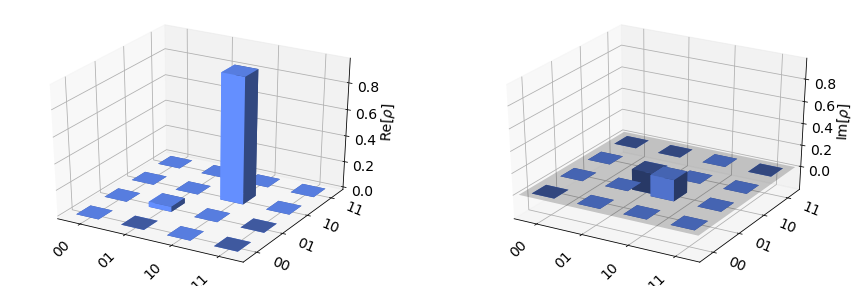

In [82]:
#same circuit as above, plotting the state vector
#1 trotter step
QC = Quantum_Circuit('odd',2,2,Var,1,B,t)
print(QC.draw())
plot_state_city(QC)

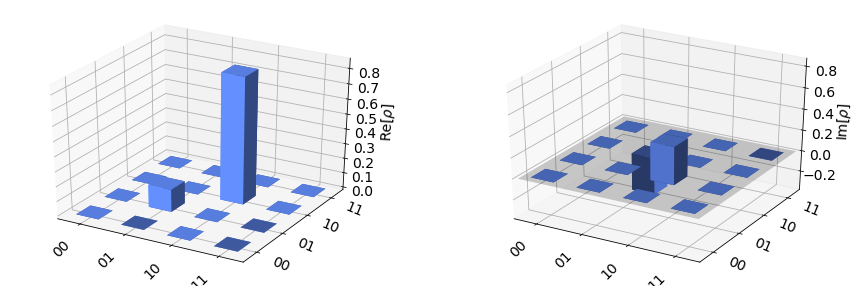

In [90]:
#2 trotter step 
QC2 = Quantum_Circuit('odd',2,2,Var,2,B,t)
plot_state_city(QC2)

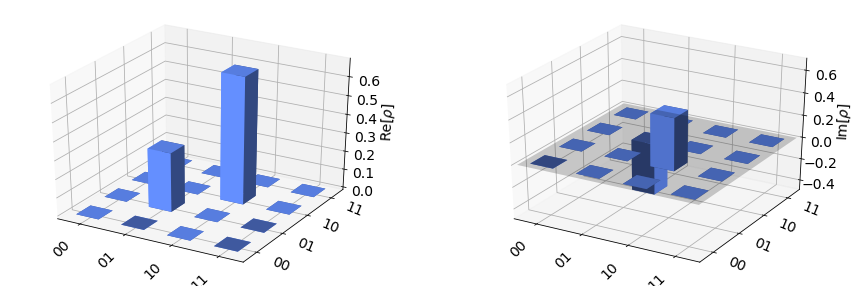

In [89]:
# 3 trotter step
QC3 = Quantum_Circuit('odd',2,2,Var,3,B,t)
plot_state_city(QC3)

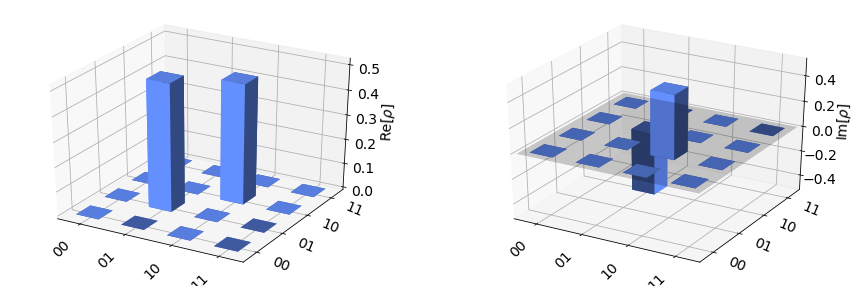

In [85]:
# 4 trotter step
QC4 = Quantum_Circuit('odd',2,2,Var,4,B,t)
plot_state_city(QC4)

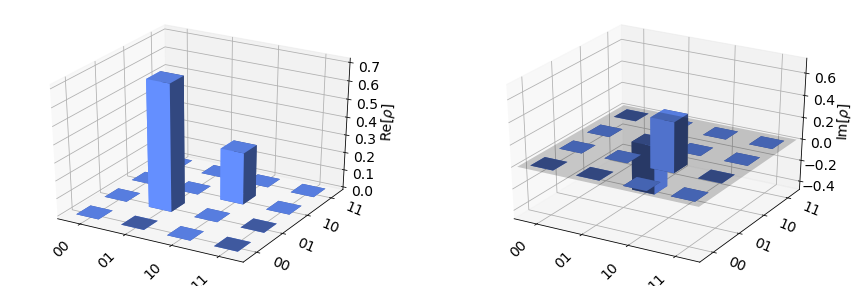

In [86]:
# 5 trotter step
QC5 = Quantum_Circuit('odd',2,2,Var,5,B,t)
plot_state_city(QC5)

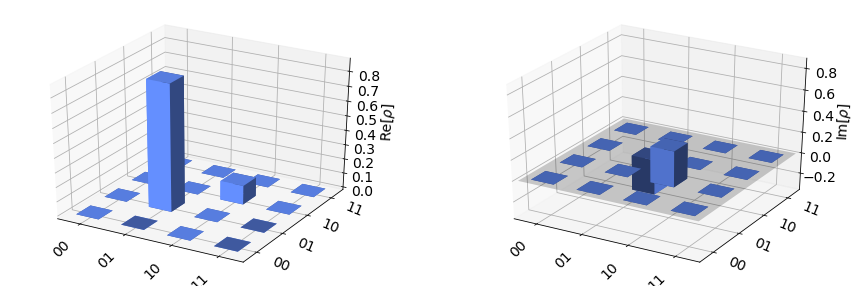

In [87]:
# 6 trotter step
QC6 = Quantum_Circuit('odd',2,2,Var,6,B,t)
plot_state_city(QC6)

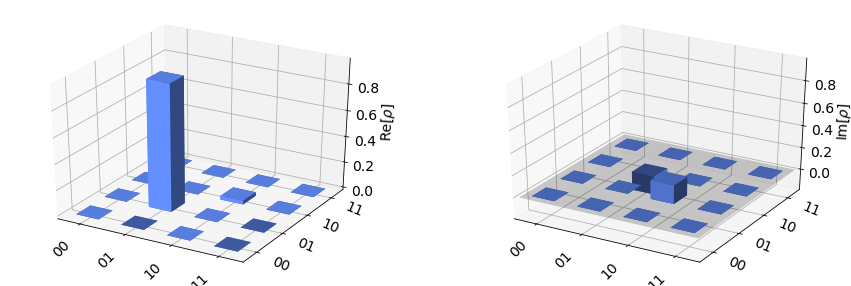

In [88]:
# 7 trotter step
QC7 = Quantum_Circuit('odd',2,2,Var,7,B,t)
plot_state_city(QC7)